In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

topolo = open ("GB1.27352.pdb.top", "r")
topol = topolo.readlines()
topolo.close()

Q_files = open ("traj.xtc.AA.Q", "r")
Q_file = Q_files.readlines()
Q_files.close()

Qi_files = open ("traj.xtc.AA.Qi", "r")
Qi_file = Qi_files.readlines()
Qi_files.close()

In [2]:
"""Counting the no. of rows in a module"""

def top_pairs(top):
    rows = 0

    for i in range(len(top)):
        if "[ pairs ]" in top[i]:
            start = i+2
            for j in range(start,len(top)):
                if "[ bonds ]" in top[j]:
                    break
                else:
                    rows += 1         
        else:
            continue

    """Selecting i-j pairs from top file"""

    atm1 = []
    atm2 = []
    end = start+rows-1

    for i in range(start,end):
        line = top[i].split()
        atm1.append(int(line[0]))
        atm2.append(int(line[1]))          

    #top = pd.DataFrame()
    #top['i'] = atm1
    #top['j'] = atm2
    
    return(atm1, atm2)

atm1, atm2 = top_pairs(topol)

In [8]:
from matplotlib.colors import LinearSegmentedColormap

"""Generating Custom Colormap"""
with open ('colormap') as f:                        # imports the custom colormap
    p = f.readlines()
q = [x.split() for x in p]

for i in range(len(q)):
    for j in range(len(q[i])):
        q[i][j] = q[i][j].strip()
        q[i][j] = float(q[i][j])
    q[i] = tuple(q[i])

cmap_name = 'custom'
cm1 = LinearSegmentedColormap.from_list(cmap_name, q)
cm2 = LinearSegmentedColormap.from_list(cmap_name, q[::-1])

##now use cmap=cm1 or cmap=cm2 in plt options

In [3]:
"""Reading Q and Qi files"""

chk1 = len(Q_file)
chk2 = len(Qi_file)
n = round(chk1/2)
frames = 0
Q = []
Qi = []

for i in range(n):
    Q.append(int(Q_file[i].strip()))
    frames += Q[i]

for i in range(frames):
    Qi.append(int(Qi_file[i].strip()))


In [4]:
thresh = [0.75, 0.85]
total = len(atm1)
start = 0
Qs = []
thresh_Q = 0

for i in range(len(Q)):
    if Q[i] >= thresh[0]*total and Q[i] <= total*thresh[1]:
        thresh_Q += 1
        stop = start+Q[i]
        Qs.extend(Qi[start:stop])
    
    start += Q[i]


In [43]:
thresh_Q

1490

In [5]:
Q = []; Qi = [];

for i in range(n,chk1):
    Q.append(int(Q_file[i].strip()))

for i in range(frames,chk2):
    Qi.append(int(Qi_file[i].strip()))


for i in range(n, len(Q)):
    if Q[i] >= thresh[0]*total and Q[i] <= total*thresh[1]:
        thresh_Q += 1
        stop = start+Q[i]
        Qs.extend(Qi[start:stop])
    
    start += Q[i]

if thresh_Q == 0:
    print("Sorry No Contacts in this threshold")
prob = {}

for i in range(len(atm1)):           #Calculating the probability of each contact pair
    prob[i+1] = Qs.count(i+1)/thresh_Q


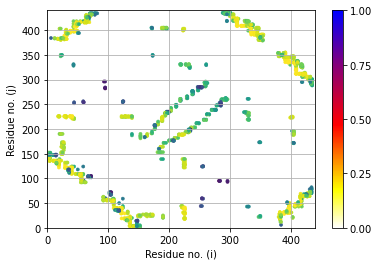

In [14]:
"""Plot the average contact map"""

x = []; y = []; p = [];

for i in range(len(atm1)):
    x.append(int(atm1[i]))
    y.append(int(atm2[i]))
    x.append(int(atm2[i]))
    y.append(int(atm1[i]))
    p.append(prob[i+1])
    p.append(prob[i+1])


plt.scatter(x,y, c = p, linewidth = 0.5, s = 10)
plt.xlim(0,440)
plt.ylim(0,440)
plt.xlabel("Residue no. (i)")
plt.ylabel("Residue no. (j)")
plt.grid()
sm = plt.cm.ScalarMappable(cmap=cm1)
sm.set_array([])
  
plt.colorbar(sm, ticks=np.linspace(0, 2, 9))

plt.show()

In [91]:
i = []; j = []; ij = []

for m in range(1,437):
    for n in range(1,437):
        i.append(m)
        j.append(n)

o = 5
        
for m in range(len(top)):
    for n in range(len(i)):
        if int(top.iloc[m,0])==i[n] and int(top.iloc[m,1]==j[n]):
            ij.append(prob[m])
        else:
            ij.append(0)
    #print("Run 1 =", m)



5


In [89]:
pro = open("prob1","w")

for m in range(len(i)):
    pro.writelines(str(i[m]) + "\t" + str(j[m]) + "\t" + str(ij[m]) + "\n")
pro.close()

In [28]:
a = int(top.iloc[0,0])
a = a-1

In [15]:
type(top.iloc[0,0])

str